# Introduction

## Table of Contents
    1- Importing Dataset
    2- Data Exploration & Visualization
    3- Data Wrangling
    4-
    5-
    6-

# Findings

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Importing Dataset

In [2]:
data = pd.read_csv("data/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 2. Data Exploration & Visualization

    Data contains;

    age - age in years
    sex - (1 = male; 0 = female)
    cp - chest pain type
    trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    chol - serum cholestoral in mg/dl
    fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    restecg - resting electrocardiographic results
    thalach - maximum heart rate achieved
    exang - exercise induced angina (1 = yes; 0 = no)
    oldpeak - ST depression induced by exercise relative to rest
    slope - the slope of the peak exercise ST segment
    ca - number of major vessels (0-3) colored by flourosopy
    thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
    target - have disease or not (1=yes, 0=no)

In [3]:
data.shape

(303, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
# Checking categorical columns for further analysis

categorical_columns = ["sex","cp","exang","ca","thal","target","fbs","restecg","slope"]

for col in categorical_columns:
    print(data[col].unique())

[1 0]
[3 2 1 0]
[0 1]
[0 2 1 3 4]
[1 2 3 0]
[1 0]
[1 0]
[0 1 2]
[0 2 1]


In [6]:
# Descriptive statistics of the dataset

data.drop(columns=categorical_columns).describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [7]:
# Database is pretty clean and ready for further analysis.

# No data-type conversion or removing missing value is needed at this point until further
# classification process.

Text(0.5, 0, 'Gender')

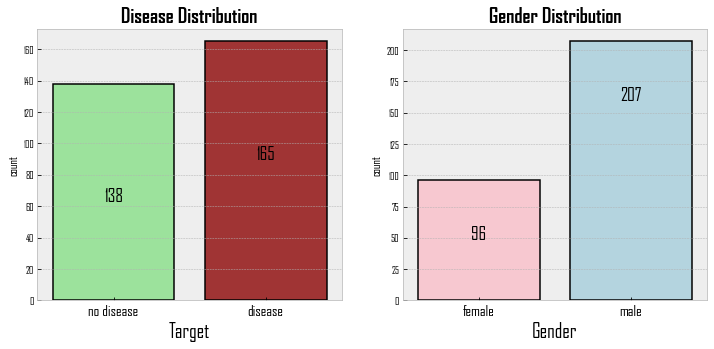

In [34]:
# checking target and gender distribution

plt.rcParams["font.family"] = "agency fb"

fig, ax = plt.subplots(1,2,figsize=(12,5))

sns.countplot(data=data,x="target",palette=['lightgreen','firebrick'],edgecolor="k",
              linewidth=1.5,ax=ax[0])
for p in ax[0].patches:
    ax[0].annotate(f'\n{p.get_height()}', 
                (p.get_x()+0.4, p.get_height()-65), ha='center', va='center', color='k', size=18)
ax[0].set_title("Disease Distribution",size=20,fontweight="bold")
ax[0].set_xticklabels(["no disease","disease"],size=15)
ax[0].set_xlabel("Target",size=20)

sns.countplot(data=data,x="sex",palette=['pink',"lightblue"],edgecolor="k",linewidth=1.5,ax=ax[1])
for p in ax[1].patches:
    ax[1].annotate(f'\n{p.get_height()}', 
                (p.get_x()+0.4, p.get_height()-35), ha='center', va='center', color='k', size=18)
ax[1].set_title("Gender Distribution",size=20,fontweight="bold")
ax[1].set_xticklabels(["female","male"],size=15)
ax[1].set_xlabel("Gender",size=20)

In [35]:
# There are 165 people with disease, whereas 138 people without disease in the dataset.

disease_percentage = str((len(data[data["target"]==1])/len(data))*100)[0:4]
print("Disease percentage :", disease_percentage)
no_disease_percentage = str((len(data[data["target"]==0])/len(data))*100)[0:4]
print("Disease percentage :", no_disease_percentage,"\n")

# There are total 207 male and 96 female in the dataset.
male_percentage = str((len(data[data["sex"]==1])/len(data))*100)[0:4]
print("Male percentage :", male_percentage)
female_percentage = str(100-((len(data[data["sex"]==1])/len(data))*100))[0:4]
print("Female percentage :", str(100-((len(data[data["sex"]==1])/len(data))*100))[0:4])

Disease percentage : 54.4
Disease percentage : 45.5 

Male percentage : 68.3
Female percentage : 31.6


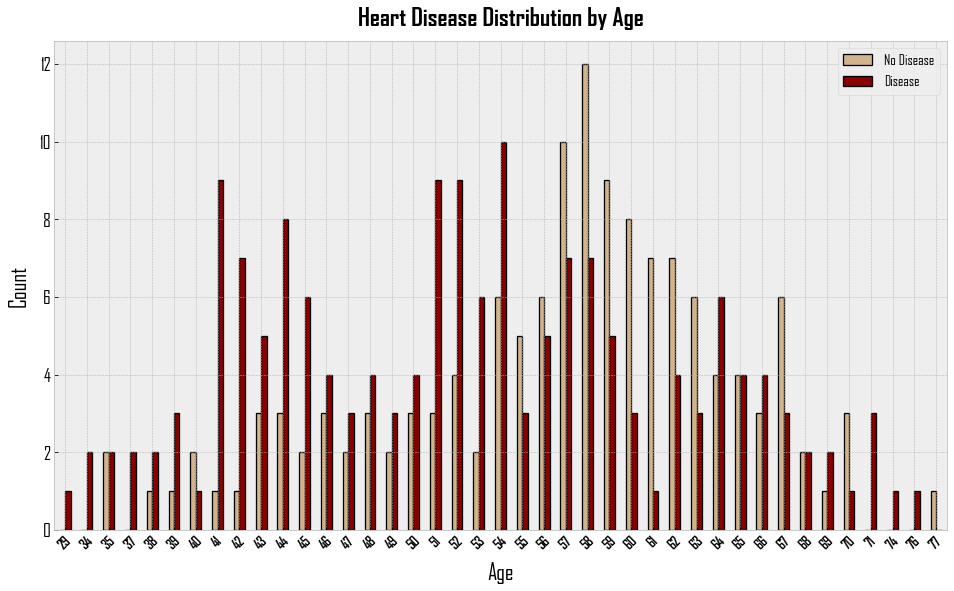

In [11]:
# Plotting Heart Disease Frequency by Age

plt.rcParams["figure.figsize"]=(16,9)
plt.style.use("bmh")

pd.crosstab(index=data["age"],columns=data["target"]).plot(kind="bar",color=['tan','darkred'],
                                                          linewidth=1.3,edgecolor="k")
plt.title("Heart Disease Distribution by Age",size=25,fontweight="bold",pad=15)
plt.xlabel('Age',size=23,labelpad=10)
plt.ylabel('Count',size=23,labelpad=10)
plt.xticks(size=13,rotation=45,fontweight="bold")
plt.yticks(size=18)
plt.legend(["No Disease","Disease"],fontsize="x-large")

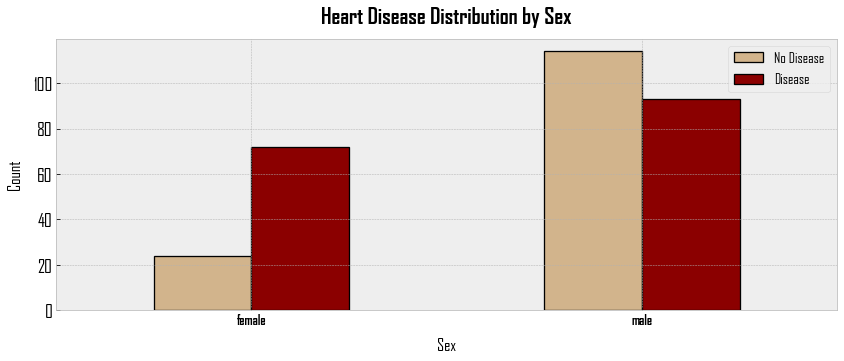

In [24]:
# Plotting Heart Disease Frequency by Sex

plt.rcParams["figure.figsize"]=(14,5)
plt.style.use("bmh")

fig, ax = plt.subplots()
pd.crosstab(index=data["sex"],columns=data["target"]).plot(kind="bar",color=['tan','darkred'],
                                                          linewidth=1.3,edgecolor="k",ax=ax)
plt.title("Heart Disease Distribution by Sex",size=22,fontweight="bold",pad=15)
plt.xlabel('Sex',size=17,labelpad=10)
plt.ylabel('Count',size=17,labelpad=10)
ax.set_xticklabels(["female","male"])
plt.xticks(size=13,rotation=0,fontweight="bold")
plt.yticks(size=18)
plt.legend(["No Disease","Disease"],fontsize="x-large")

# Apparently, the older the people become, there are higher chances of hearth disease.

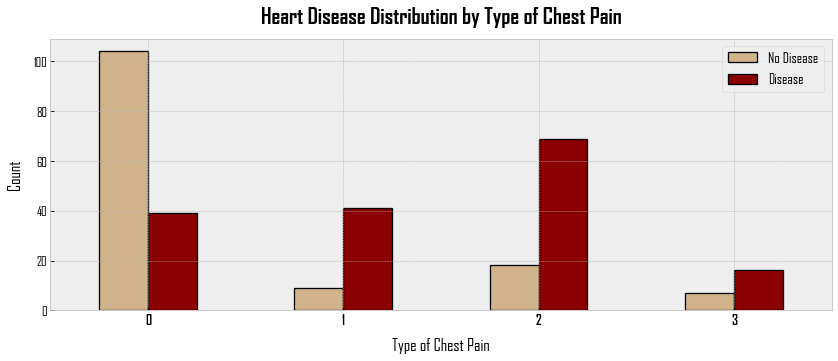

In [48]:
fig, ax = plt.subplots()
pd.crosstab(index=data["cp"],columns=data["target"]).plot(kind="bar",color=['tan','darkred'],
                                                          linewidth=1.3,edgecolor="k",ax=ax)
plt.title("Heart Disease Distribution by Type of Chest Pain",size=22,fontweight="bold",pad=15)
plt.xlabel('Type of Chest Pain',size=17,labelpad=10)
plt.ylabel('Count',size=17,labelpad=10)
#ax.set_xticklabels(["female","male"])
plt.xticks(size=13,rotation=0,fontweight="bold")
plt.yticks(size=13)
plt.legend(["No Disease","Disease"],fontsize="x-large")

# Apparently, chest pain type 1, 2 and 3 have some relationship with hearth disease occurence.

<AxesSubplot:>

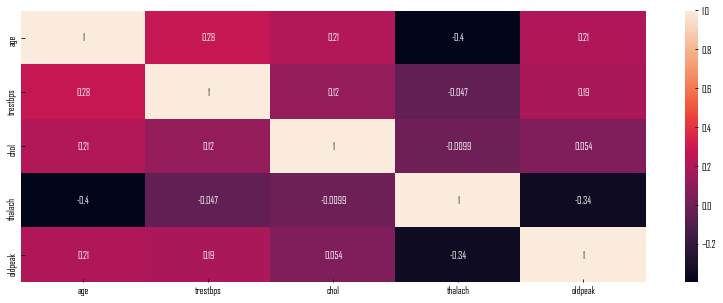

In [56]:
# Checking multi-collinearity between features for further analysis by using heatmap

sns.heatmap(data.drop(columns=categorical_columns).corr(),annot=True)

# None of the features are highly correlated with each other, which is nice for further analysis.

### 3. Data Wrangling

##### Creating Dummy Variables